In [ ]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.rc('font', family='NanumBarunGothic')

# 모델 생성 및 예측

In [ ]:
data = pd.read_csv('2011-2021car_cnt.csv', index_col=0)
data = data.drop('sum', axis=0)

In [ ]:
data

,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1월,181288,178702,176556,176369,185870,191400,196608,202314,204436,204915,204927
2월,181509,177894,176144,176134,185814,191177,196928,202403,203803,204000,204353
3월,181745,177359,175593,176380,185825,191672,197578,202812,203737,204343,204246
4월,181785,176835,175387,176648,186248,191921,198130,203033,203437,205032,204405
5월,181662,176956,175259,176919,186689,192572,198721,203069,203700,205114,204418
6월,181898,177631,175319,177750,187489,193200,199965,203299,203724,205404,204889
7월,181726,177276,175194,179550,187729,193452,200210,203823,203716,205277,205032
8월,180945,176183,175022,180932,187824,193279,200033,203403,203422,204549,204935
9월,180792,176248,175006,182101,188720,193557,200673,203332,203551,204629,204866
10월,180498,176382,175296,183228,189323,193745,200915,203475,203829,204580,204285


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 mis

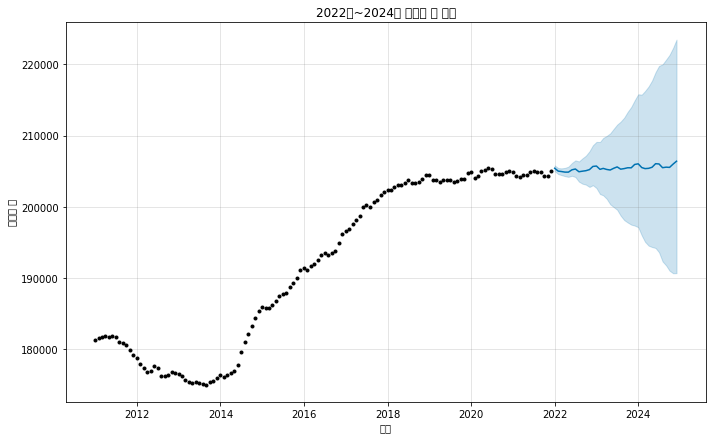

In [ ]:
date = []
for col in data.columns:
    col = int(col.split('년')[0])
    for i in data.index:
        i = int(i.split('월')[0])
        date.append(datetime(col, i, 1))

value = []
for col in data.columns:
    for i in data[col]:
        value.append(i)

df = pd.DataFrame({'ds': date, 'y': value})

# 모델 생성 및 학습
model = Prophet()
model.fit(df)

next_3year = list()
for year in range(2022, 2025):
    for month in range(1, 13):
        next_3year.append(['{}-%02d'.format(year) % month])
next_3year = pd.DataFrame(next_3year, columns=['ds'])
next_3year['ds'] = pd.to_datetime(next_3year['ds'])

# 모델 예측
forecast = model.predict(next_3year)

# 시각화
model.plot(forecast)
plt.title('2022년~2024년 자동차 수 예측')
plt.xlabel('년도')
plt.ylabel('자동차 수')
plt.show()

In [ ]:
df

,ds,y
0,2011-01-01,181288
1,2011-02-01,181509
2,2011-03-01,181745
3,2011-04-01,181785
4,2011-05-01,181662
...,...,...
127,2021-08-01,204935
128,2021-09-01,204866
129,2021-10-01,204285
130,2021-11-01,204369


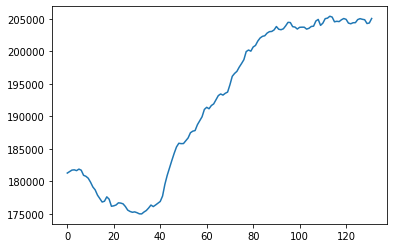

In [ ]:
df['y'].plot()

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,205407.754352,205006.790148,205810.531717
1,2022-02-01,205006.762358,204586.720428,205433.754037
2,2022-03-01,204949.115258,204449.855695,205393.895462
3,2022-04-01,204865.917290,204299.540111,205463.113613
4,2022-05-01,204864.577331,204199.260167,205632.321712
5,2022-06-01,205191.840559,204351.243180,206153.479715
6,2022-07-01,205304.574267,204175.769177,206516.816723
7,2022-08-01,204919.225085,203527.375183,206365.424311
8,2022-09-01,204999.764664,203236.816242,206805.034842
9,2022-10-01,205068.011361,203109.267184,207176.862994


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

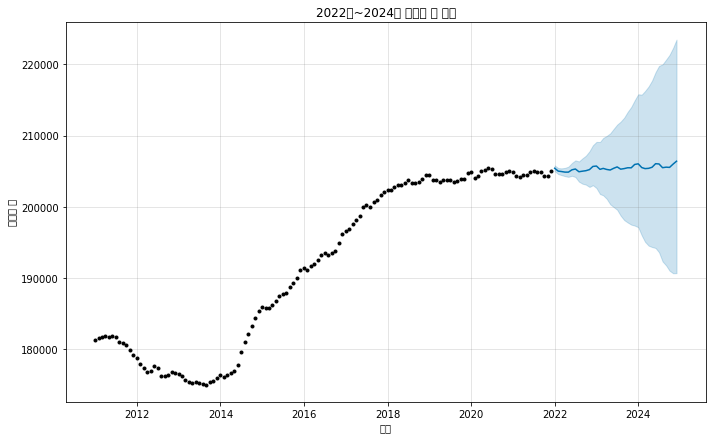

In [ ]:
model.plot(forecast)
plt.title('2022년~2024년 자동차 수 예측')
plt.xlabel('년도')
plt.ylabel('자동차 수')
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,204906.897949,205006.790148,205810.531717,204906.897949,204908.533067,500.856404,500.856404,500.856404,500.856404,500.856404,500.856404,0.0,0.0,0.0,205407.754352
1,2022-02-01,204934.218713,204586.720428,205433.754037,204867.358727,205046.895235,72.543645,72.543645,72.543645,72.543645,72.543645,72.543645,0.0,0.0,0.0,205006.762358
2,2022-03-01,204958.895532,204449.855695,205393.895462,204756.710482,205190.704421,-9.780274,-9.780274,-9.780274,-9.780274,-9.780274,-9.780274,0.0,0.0,0.0,204949.115258
3,2022-04-01,204986.216296,204299.540111,205463.113613,204607.105551,205396.056417,-120.299007,-120.299007,-120.299007,-120.299007,-120.299007,-120.299007,0.0,0.0,0.0,204865.917290
4,2022-05-01,205012.655745,204199.260167,205632.321712,204447.067365,205613.947877,-148.078414,-148.078414,-148.078414,-148.078414,-148.078414,-148.078414,0.0,0.0,0.0,204864.577331
5,2022-06-01,205039.976509,204351.243180,206153.479715,204156.017834,205897.683211,151.864050,151.864050,151.864050,151.864050,151.864050,151.864050,0.0,0.0,0.0,205191.840559
6,2022-07-01,205066.415958,204175.769177,206516.816723,203970.521416,206226.554731,238.158309,238.158309,238.158309,238.158309,238.158309,238.158309,0.0,0.0,0.0,205304.574267
7,2022-08-01,205093.736722,203527.375183,206365.424311,203732.300985,206560.948239,-174.511637,-174.511637,-174.511637,-174.511637,-174.511637,-174.511637,0.0,0.0,0.0,204919.225085
8,2022-09-01,205121.057486,203236.816242,206805.034842,203539.472739,206865.176641,-121.292823,-121.292823,-121.292823,-121.292823,-121.292823,-121.292823,0.0,0.0,0.0,204999.764664
9,2022-10-01,205147.496935,203109.267184,207176.862994,203153.047356,207227.469835,-79.485575,-79.485575,-79.485575,-79.485575,-79.485575,-79.485575,0.0,0.0,0.0,205068.011361


강서구의 차량 수가 점점 증가할 것으로 예측

즉, 차량수와 불법주정차 단속 건수는 영향을 받기 때문에 불법주정차 관련 문제가 증가할 것으로 판단